In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.interpolate
import scipy.ndimage

In [3]:
vid_data = np.load('../Data/2frames.npz')['data']
img_orig=vid_data[:,:,0]
img_target=vid_data[:,:,0]
data=np.load('../Scripts/createdFile0.npz')

In [4]:
vid_data.shape

(1024, 1000, 2)

[    7.    13.     9.    63.    95.    95.    97.   109.   127.   141.
   175.   173.   189.   205.   221.   273.   271.   271.   283.   283.
   317.   333.   335.   365.   381.   415.   415.   431.   447.   461.
   479.   493.   509.   525.   541.   555.   573.   587.   605.   637.
   637.   651.   671.   665.   703.   723.   737.   751.   771.   787.
   801.   815.   833.   825.   843.   881.   933.   947.   933.   949.
   953.   955.   997.  1015.]


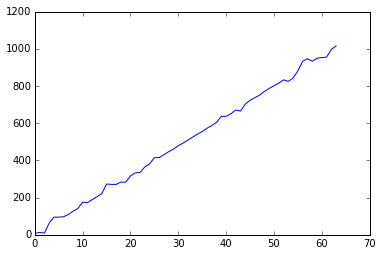

In [5]:
print data['yshifts_centered']
plt.plot(data['yshifts_centered'])

[ -1. -11. -31.   7.  23.   7.  -7. -11.  -9. -11.   7. -11. -11. -11. -11.
  25.   7.  -9. -13. -29. -11. -11. -25. -11. -11.   7.  -9.  -9.  -9. -11.
  -9. -11. -11. -11. -11. -13. -11. -13. -11.   5. -11. -13.  -9. -31.  -9.
  -5.  -7.  -9.  -5.  -5.  -7.  -9.  -7. -31. -29.  -7.  29.  27.  -3.  -3.
 -15. -29.  -3.  -1.]


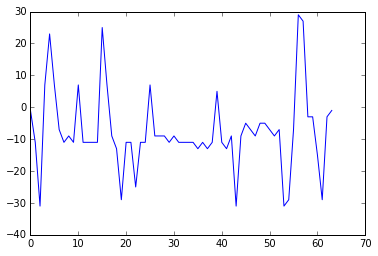

In [6]:
print data['yshifts']
plt.plot(data['yshifts'])

[-1 -1 -1 -1 -1 -1  4  4  2  2 -1  2  2  2  2 -1 -1  2  2 11 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1  2  2  2  2 -1 -1
 -1 -1 -1 -1 -1 -1 13 15  2  2 -1 -1  2  2]


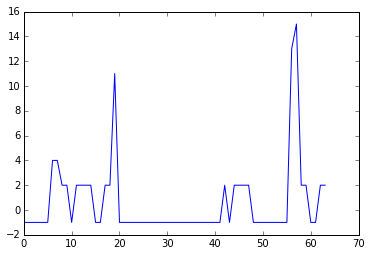

In [7]:
print data['xshifts']
plt.plot(data['xshifts'])

In [8]:
print data['yshifts_centered'].dtype
print np.float64(data['xshifts']).dtype

float64
float64


In [9]:
print data['yshifts_centered']

[    7.    13.     9.    63.    95.    95.    97.   109.   127.   141.
   175.   173.   189.   205.   221.   273.   271.   271.   283.   283.
   317.   333.   335.   365.   381.   415.   415.   431.   447.   461.
   479.   493.   509.   525.   541.   555.   573.   587.   605.   637.
   637.   651.   671.   665.   703.   723.   737.   751.   771.   787.
   801.   815.   833.   825.   843.   881.   933.   947.   933.   949.
   953.   955.   997.  1015.]


In [10]:
transform_x = scipy.fftpack.dct(np.float64(data['xshifts']),type=2,norm='ortho')
transform_y = scipy.fftpack.dct(data['yshifts_centered'],type=2,norm='ortho')

In [11]:
fit_x = scipy.fftpack.idct(transform_x,norm='ortho')
fit_y = scipy.fftpack.idct(transform_y,norm='ortho')

In [29]:
print len(fit_x)
print len(fit_y)

64
64


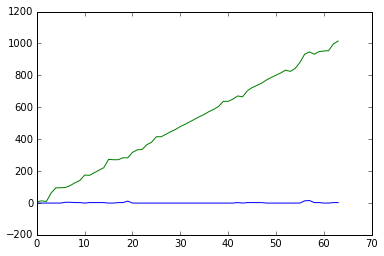

In [12]:
plt.plot(fit_x)
plt.plot(fit_y)

In [22]:
old_x = np.linspace(0,1023,len(fit_y))
new_x = np.arange(1024)

fy = scipy.interpolate.InterpolatedUnivariateSpline(x=old_x,y=fit_y)
fx = scipy.interpolate.InterpolatedUnivariateSpline(x=old_x,y=fit_x)



In [33]:
print fx(np.linspace(0,1024,100))

[ -1.          -1.00996381  -0.99198894  -0.99509973  -1.03711523
  -0.94990158  -0.89534737  -1.45986498  -0.66011442   2.77042759
   4.71965798   3.98428095   2.45165034   2.06347266   2.14506413
   0.03163276  -0.79506274   1.47428489   2.41751976   1.92983749
   1.87042971   2.24996145   1.97520637   0.07862406  -1.54664237
  -1.20435651   1.13853962   1.73075779   1.15839929   7.29518498
  10.54318748   2.13196781  -2.55947122  -0.95133611  -0.71299901
  -1.10730626  -1.01336696  -0.97473193  -1.00655622  -1.00240498
  -0.99794823  -1.00031936  -1.00028279  -0.99984541  -1.00000636
  -1.00002797  -0.99998915  -0.99999875  -1.00000329  -0.99999805
  -0.99999771  -1.00001075  -0.99999019  -0.99996201  -1.00012614
  -0.99996594  -0.9994104   -1.00138179  -1.00065319  -0.99172555
  -1.0134066   -1.02015506  -0.89269747  -1.10470559  -1.37752925
   0.48848833   1.96694377  -0.22607423  -0.5468808    1.86638605
   2.37398144   1.86170418   1.91605449   2.33039106   1.67823306
  -0.43063

In [38]:
idx = np.empty((1024,1000,2))
idx[:] = np.NAN

for y in range(1024):
    for x in range(1000):
        idx[y,x,0]=fy(y)
        idx[y,x,1]=fx(y) + x
        
        

In [39]:
idx[0:5,0:5,0].round()

array([[  7.,   7.,   7.,   7.,   7.],
       [ 10.,  10.,  10.,  10.,  10.],
       [ 12.,  12.,  12.,  12.,  12.],
       [ 14.,  14.,  14.,  14.,  14.],
       [ 15.,  15.,  15.,  15.,  15.]])

In [40]:
print data['xshifts']

[-1 -1 -1 -1 -1 -1  4  4  2  2 -1  2  2  2  2 -1 -1  2  2 11 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1  2  2  2  2 -1 -1
 -1 -1 -1 -1 -1 -1 13 15  2  2 -1 -1  2  2]


In [41]:
print data['yshifts']

[ -1. -11. -31.   7.  23.   7.  -7. -11.  -9. -11.   7. -11. -11. -11. -11.
  25.   7.  -9. -13. -29. -11. -11. -25. -11. -11.   7.  -9.  -9.  -9. -11.
  -9. -11. -11. -11. -11. -13. -11. -13. -11.   5. -11. -13.  -9. -31.  -9.
  -5.  -7.  -9.  -5.  -5.  -7.  -9.  -7. -31. -29.  -7.  29.  27.  -3.  -3.
 -15. -29.  -3.  -1.]


In [45]:
newimg = scipy.ndimage.interpolation.map_coordinates(img_orig,[idx[:,:,0].ravel(),idx[:,:,1].ravel()],order=1)

In [46]:
newimg=newimg.reshape((1024,1000))

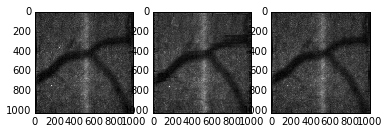

In [47]:
plt.figure(1)                
plt.subplot(131)             
plt.imshow(img_orig,cmap=plt.get_cmap('gray'))
plt.subplot(132)             
plt.imshow(newimg,cmap=plt.get_cmap('gray'))
plt.subplot(133)    
plt.imshow(img_target,cmap=plt.get_cmap('gray'))
plt.show()